# PRCP-1004-Fifa20:

# Problem Statement:

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:Explore the data and attempt all the below asked questions in a 
step by step manner:

        ●Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
        ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
        ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 



## Importing with Libraries:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Importing csv file

In [49]:
data=pd.read_csv('Downloads/PRCP-1004-Fifa20/Data/players_20.csv')
data


sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

# Domain Analysis:

The FIFA 20 Player Data Analysis project focuses on exploring and deriving insights from player attributes in the FIFA 20 dataset. This domain involves sports analytics, particularly evaluating football players' performance based on skills such as pace, shooting, passing, and defending. The project applies machine learning techniques like clustering (K-Means) to categorize players and regression models to predict overall ratings. Key insights can help in player scouting, team formation, and performance evaluation. Additionally, statistical and visualization techniques provide a deeper understanding of player strengths and weaknesses.

# Basic Checks

In [51]:
data.head()   # showing first 5 rows and columns

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [13]:
data.tail()   # showing last 5 rows and columns

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  ...   lwb   ldm   cdm   rdm  \
18273    China PR               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2   
18274    China PR               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2   
18275    China PR         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2   
18276    China PR  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2   
18277    China PR         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2   

        rwb    lb   lcb    cb   rcb    rb  
18273  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  

[5 rows x 104 columns]

In [15]:
data.shape  # it showing number of rows and columns and data 

(18278, 104)

In [17]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [21]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

#  Exploratory Data Analysis(EDA)

# Histogram

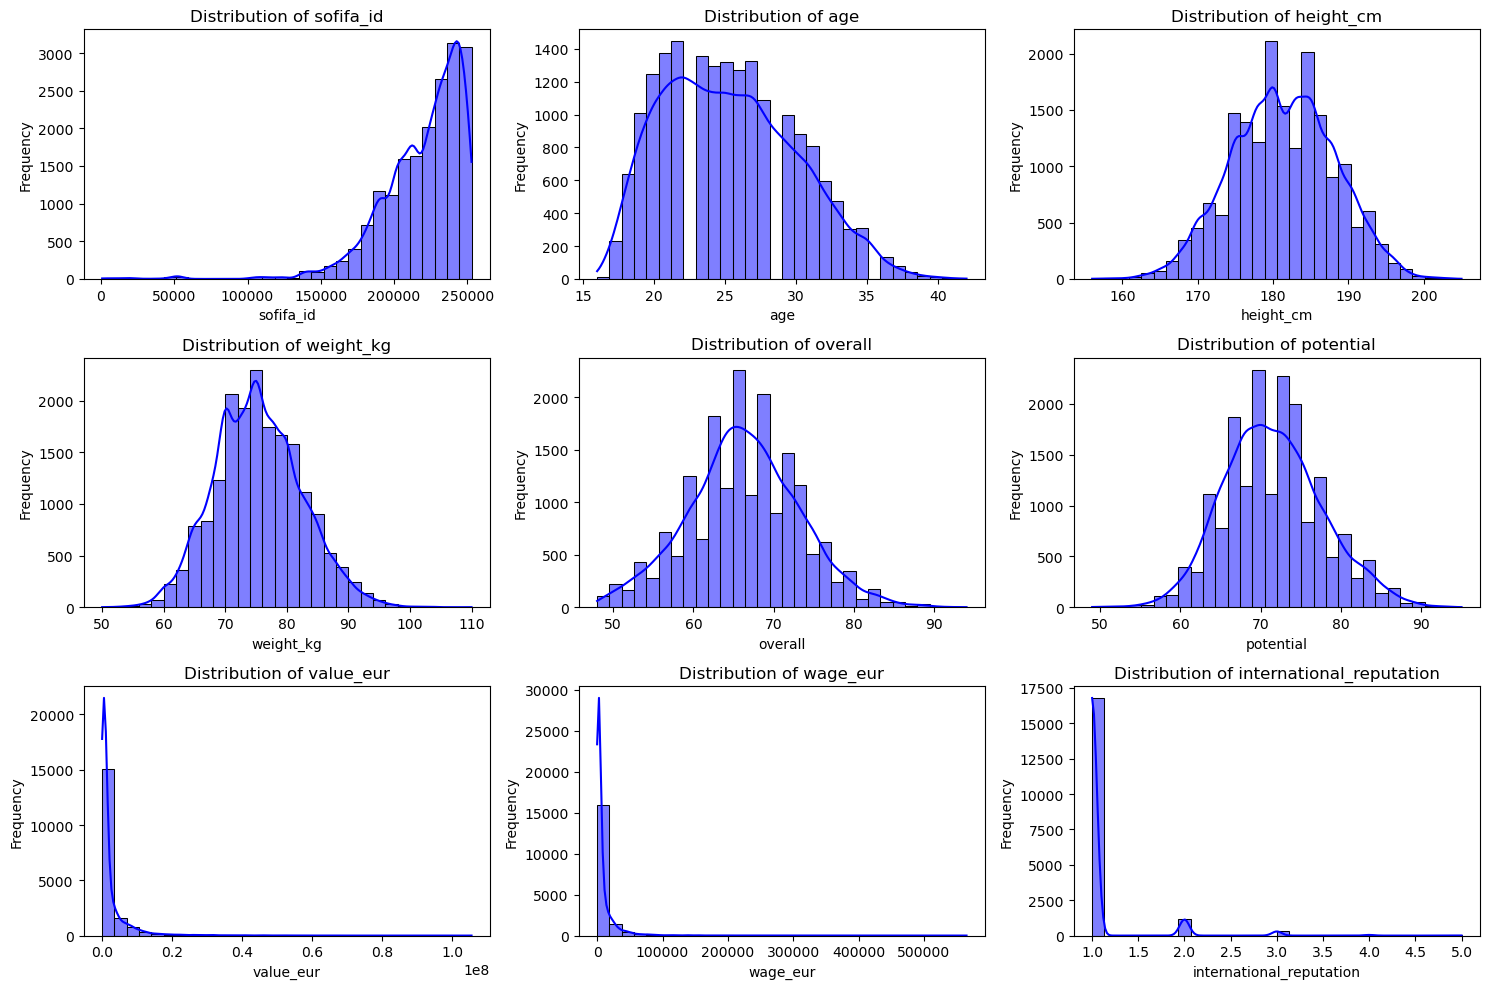

In [53]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns  

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:9]):  # Limiting to 9 features for better visualization
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Count Plot:

# Nationality in Fifa-20

In [24]:
data['club'].value_counts().head()

club
FC Barcelona           33
Real Valladolid CF     33
VfL Wolfsburg          33
Crystal Palace         33
Eintracht Frankfurt    33
Name: count, dtype: int64

In [26]:
data['nationality'].value_counts().head()

nationality
England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: count, dtype: int64

# Count Plot:

# Club in Fifa-20

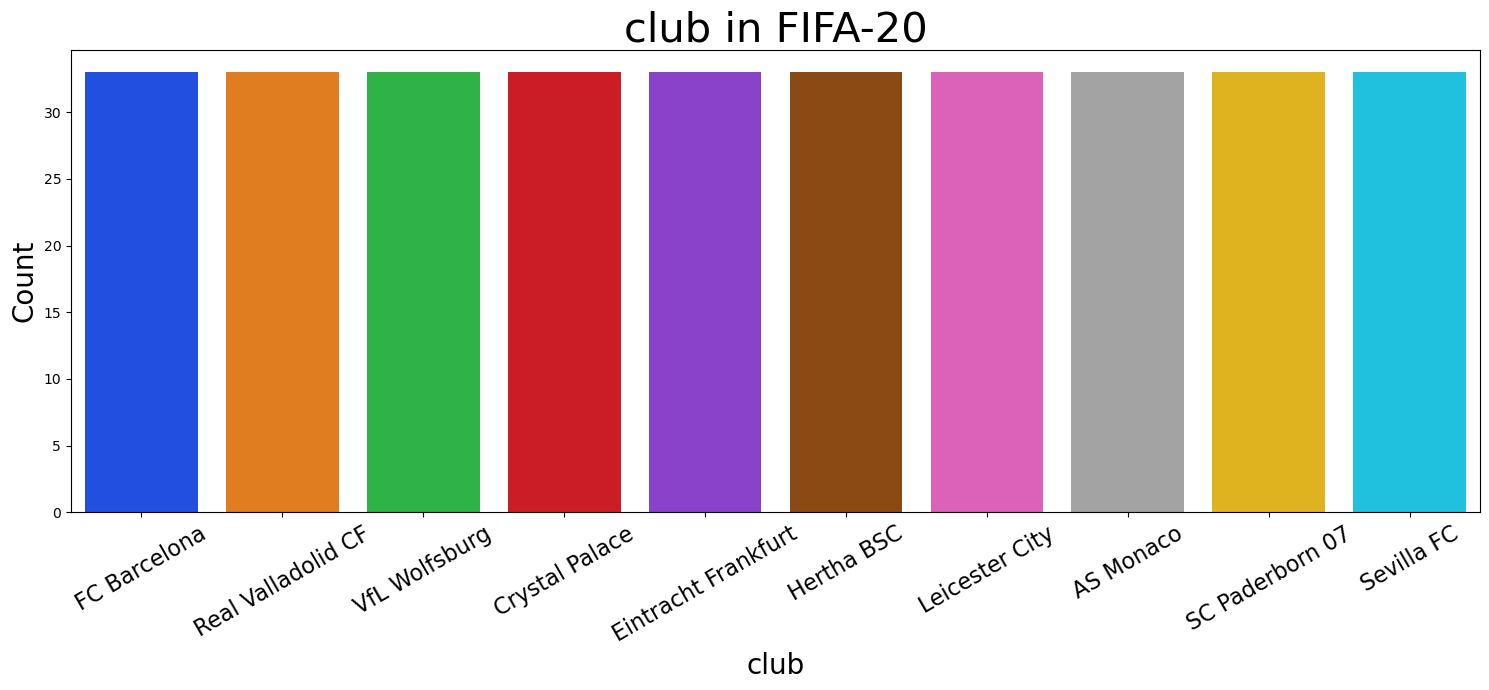

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(x='club',data=data,palette='bright',order=data.club.value_counts().iloc[:10].index)
plt.title('club in FIFA-20',fontsize=30)
plt.xlabel('club',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=30,fontsize=16)
plt.tight_layout()
plt.show()

# Nationality in Fifa-20

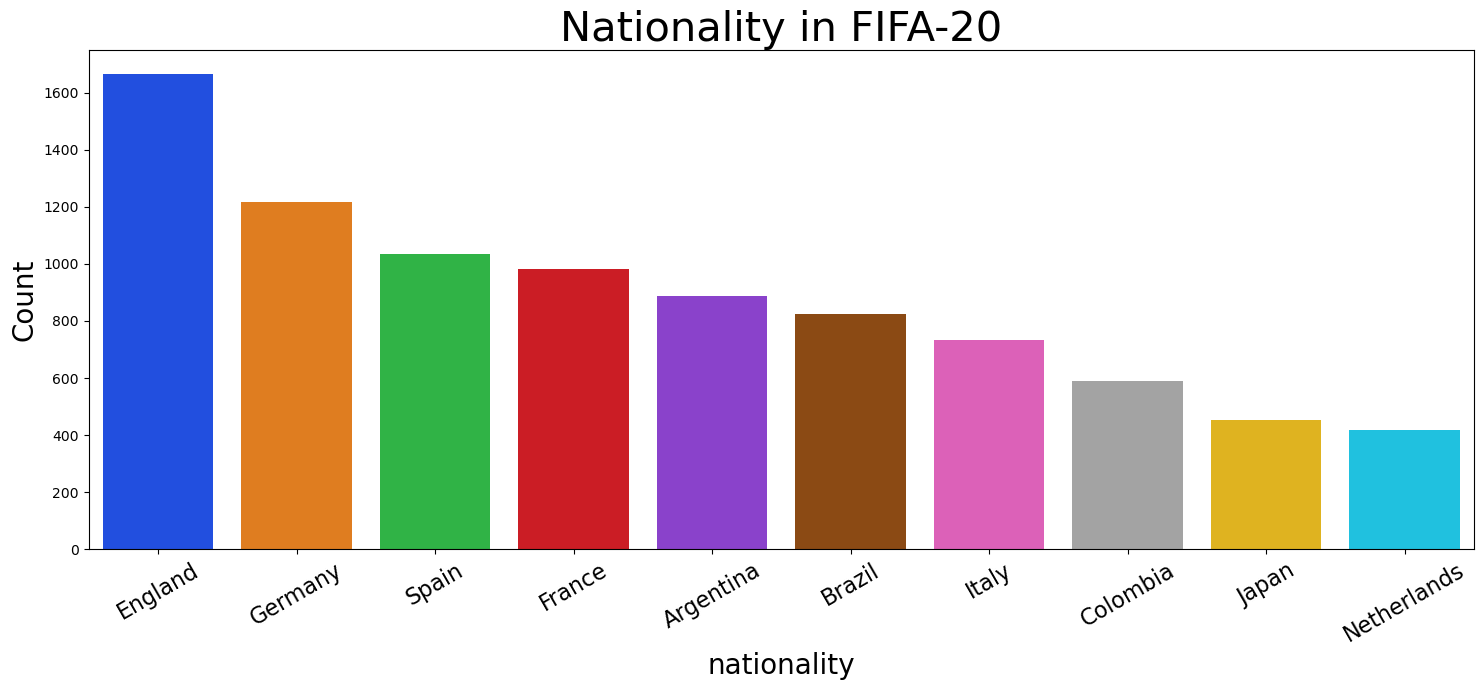

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='nationality',data=data,palette='bright',order=data.nationality.value_counts().iloc[:10].index)
plt.title('Nationality in FIFA-20',fontsize=30)
plt.xlabel('nationality',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=30,fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
data['age'].value_counts()

age
22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: count, dtype: int64

# Distribution Plot:

# Age Distribution of Players in Fifa-20:

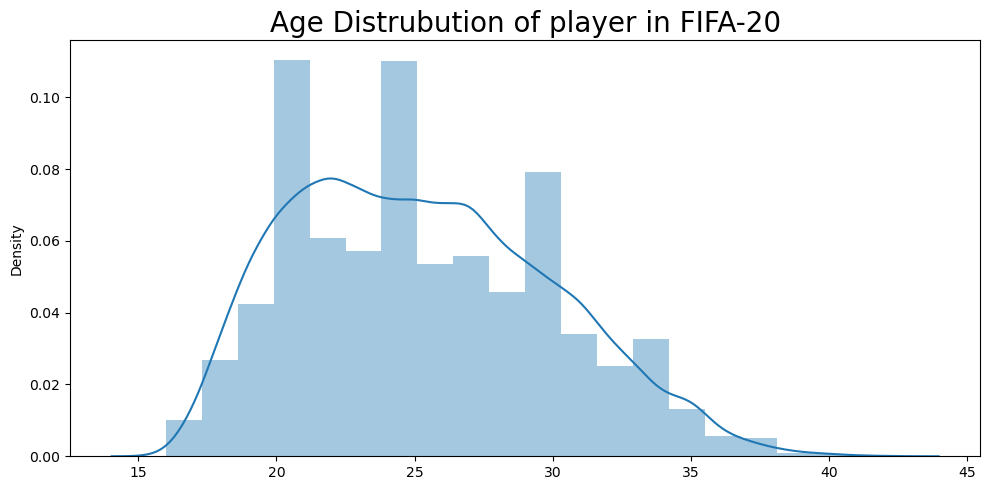

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(x=data['age'],kde=True,bins=20)
plt.title('Age Distrubution of player in FIFA-20', fontsize=20)
plt.tight_layout()
plt.show()

# Count Plot:

# Age Count of Fifa Players-20:

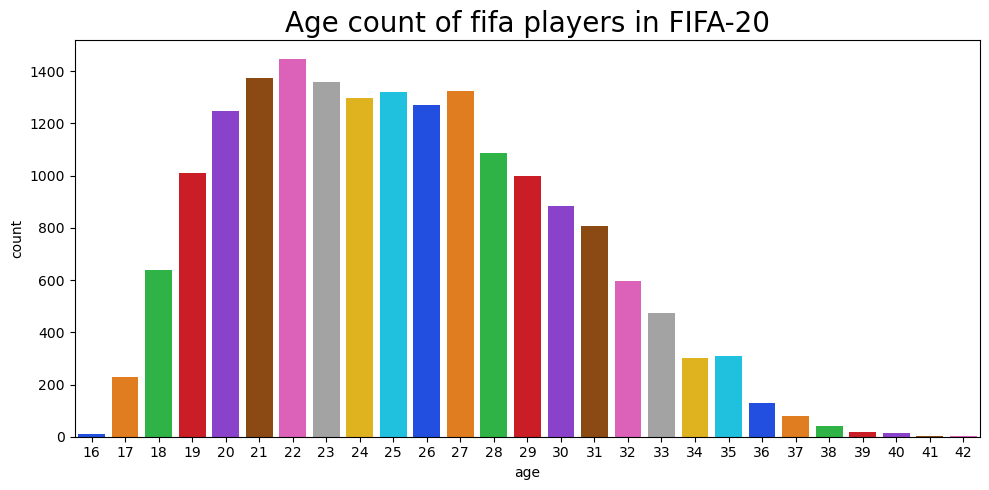

In [61]:
plt.figure(figsize=(10,5))
plt.title('Age count of fifa players in FIFA-20', fontsize=20)
sns.countplot(x='age',data=data,palette='bright')
plt.tight_layout()
plt.show()

# Line Plot:

# Age vs Overall:

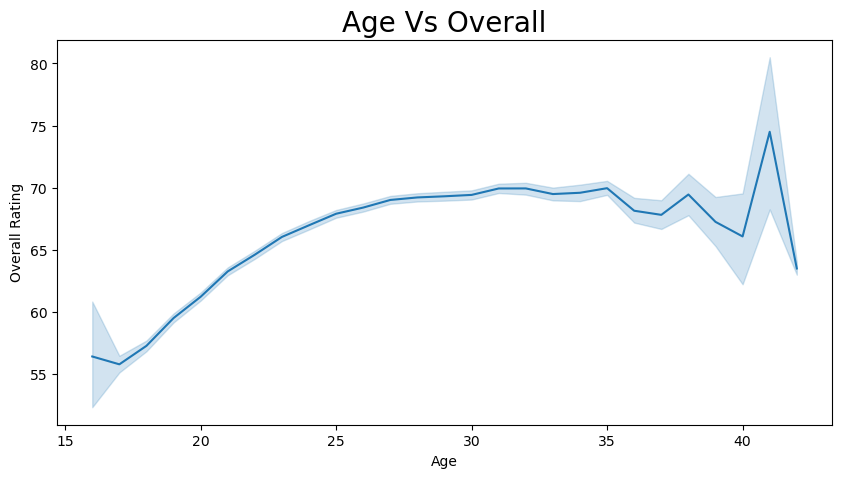

In [63]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='age', y='overall', palette='Wistia')
plt.title('Age Vs Overall', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

# Age vs Potential:

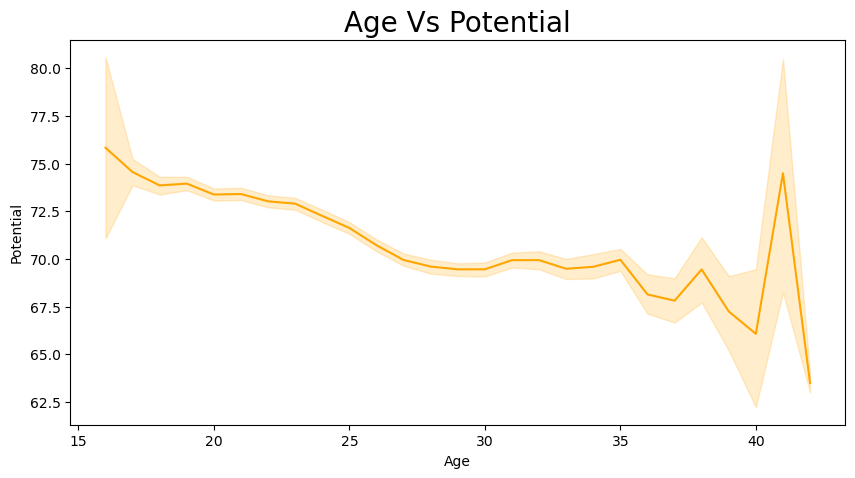

In [65]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='age', y='potential', color='orange')
plt.title('Age Vs Potential', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

# Scatter Plot

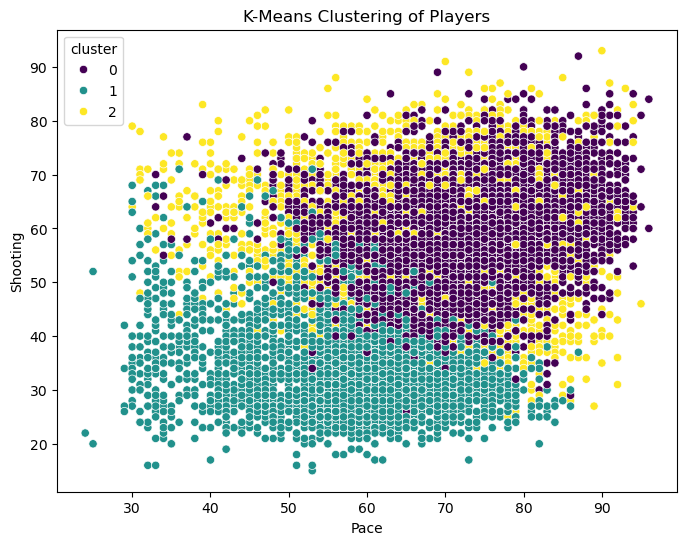

In [106]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = data[features]

# Handle missing values by replacing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Now, plot the clusters correctly
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['pace'], y=data['shooting'], hue=data['cluster'], palette='viridis')
plt.title('K-Means Clustering of Players')
plt.xlabel('Pace')
plt.ylabel('Shooting')
plt.show()


# Pair Plot

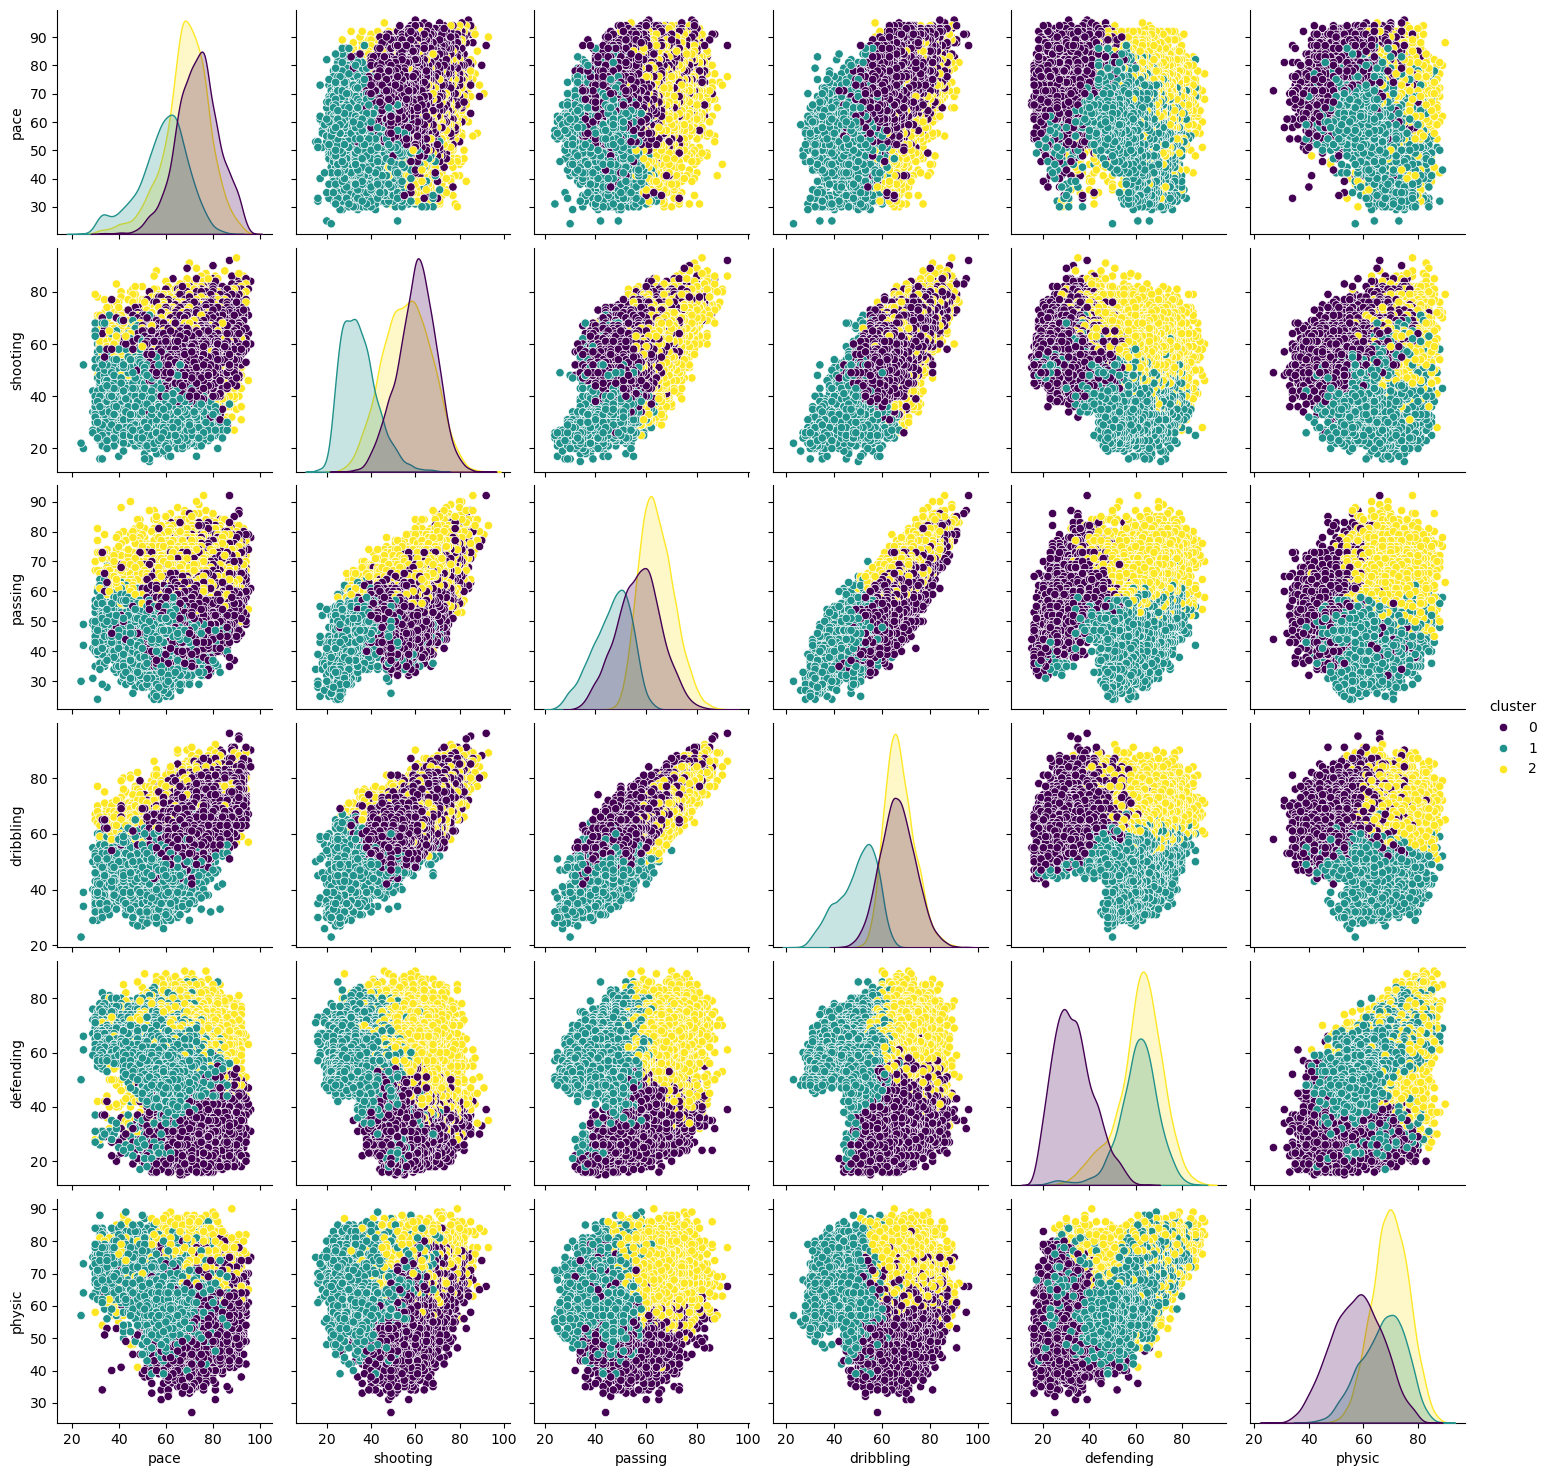

In [108]:
sns.pairplot(data[features + ['cluster']], hue='cluster', palette='viridis')
plt.show()

# Heat Map

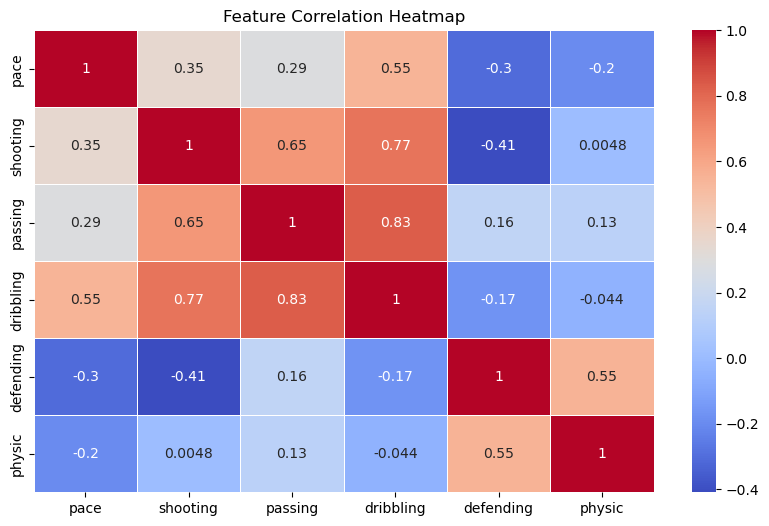

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


# Bar plot

<Figure size 1000x600 with 0 Axes>

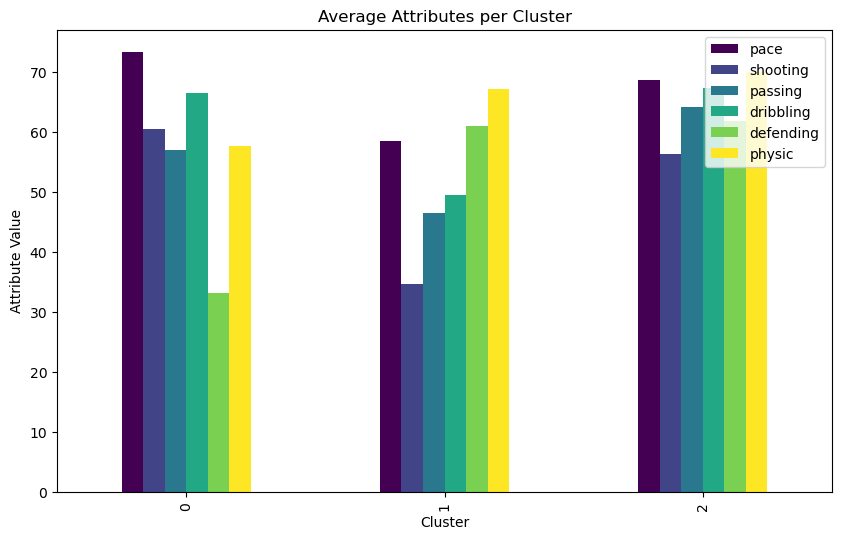

In [109]:
plt.figure(figsize=(10,6))
data.groupby('cluster')[features].mean().plot(kind='bar', figsize=(10,6), cmap='viridis')
plt.title('Average Attributes per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Attribute Value')
plt.legend(loc='best')
plt.show()

# Data preprocessing

In [ ]:
# Deleting Unreqiured data

In [75]:
# This all columns are not important that's why we are going to drop mentioned columns
unnecessary_columns = [
    'sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'club', 'nationality',
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
    'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
    'player_traits', 'player_tags', 'value_eur', 'wage_eur', 'team_position', 'team_jersey_number',
    'body_type', 'real_face', 'release_clause_eur'
]

# Drop unnecessary columns
data1 = data.drop(columns=unnecessary_columns)

# Display the first few rows of the cleaned dataset
print(data1.head())

   age  height_cm  weight_kg  overall  potential player_positions  \
0   32        170         72       94         94       RW, CF, ST   
1   34        187         83       93         93           ST, LW   
2   27        175         68       92         92          LW, CAM   
3   26        188         87       91         93               GK   
4   28        175         74       91         91           LW, CF   

  preferred_foot  international_reputation  weak_foot  skill_moves  ...  \
0           Left                         5          4            4  ...   
1          Right                         5          4            5  ...   
2          Right                         5          5            5  ...   
3          Right                         3          3            1  ...   
4          Right                         4          4            4  ...   

  mentality_penalties mentality_composure defending_marking  \
0                  75                  96                33   
1       

In [ ]:
# Boxplot

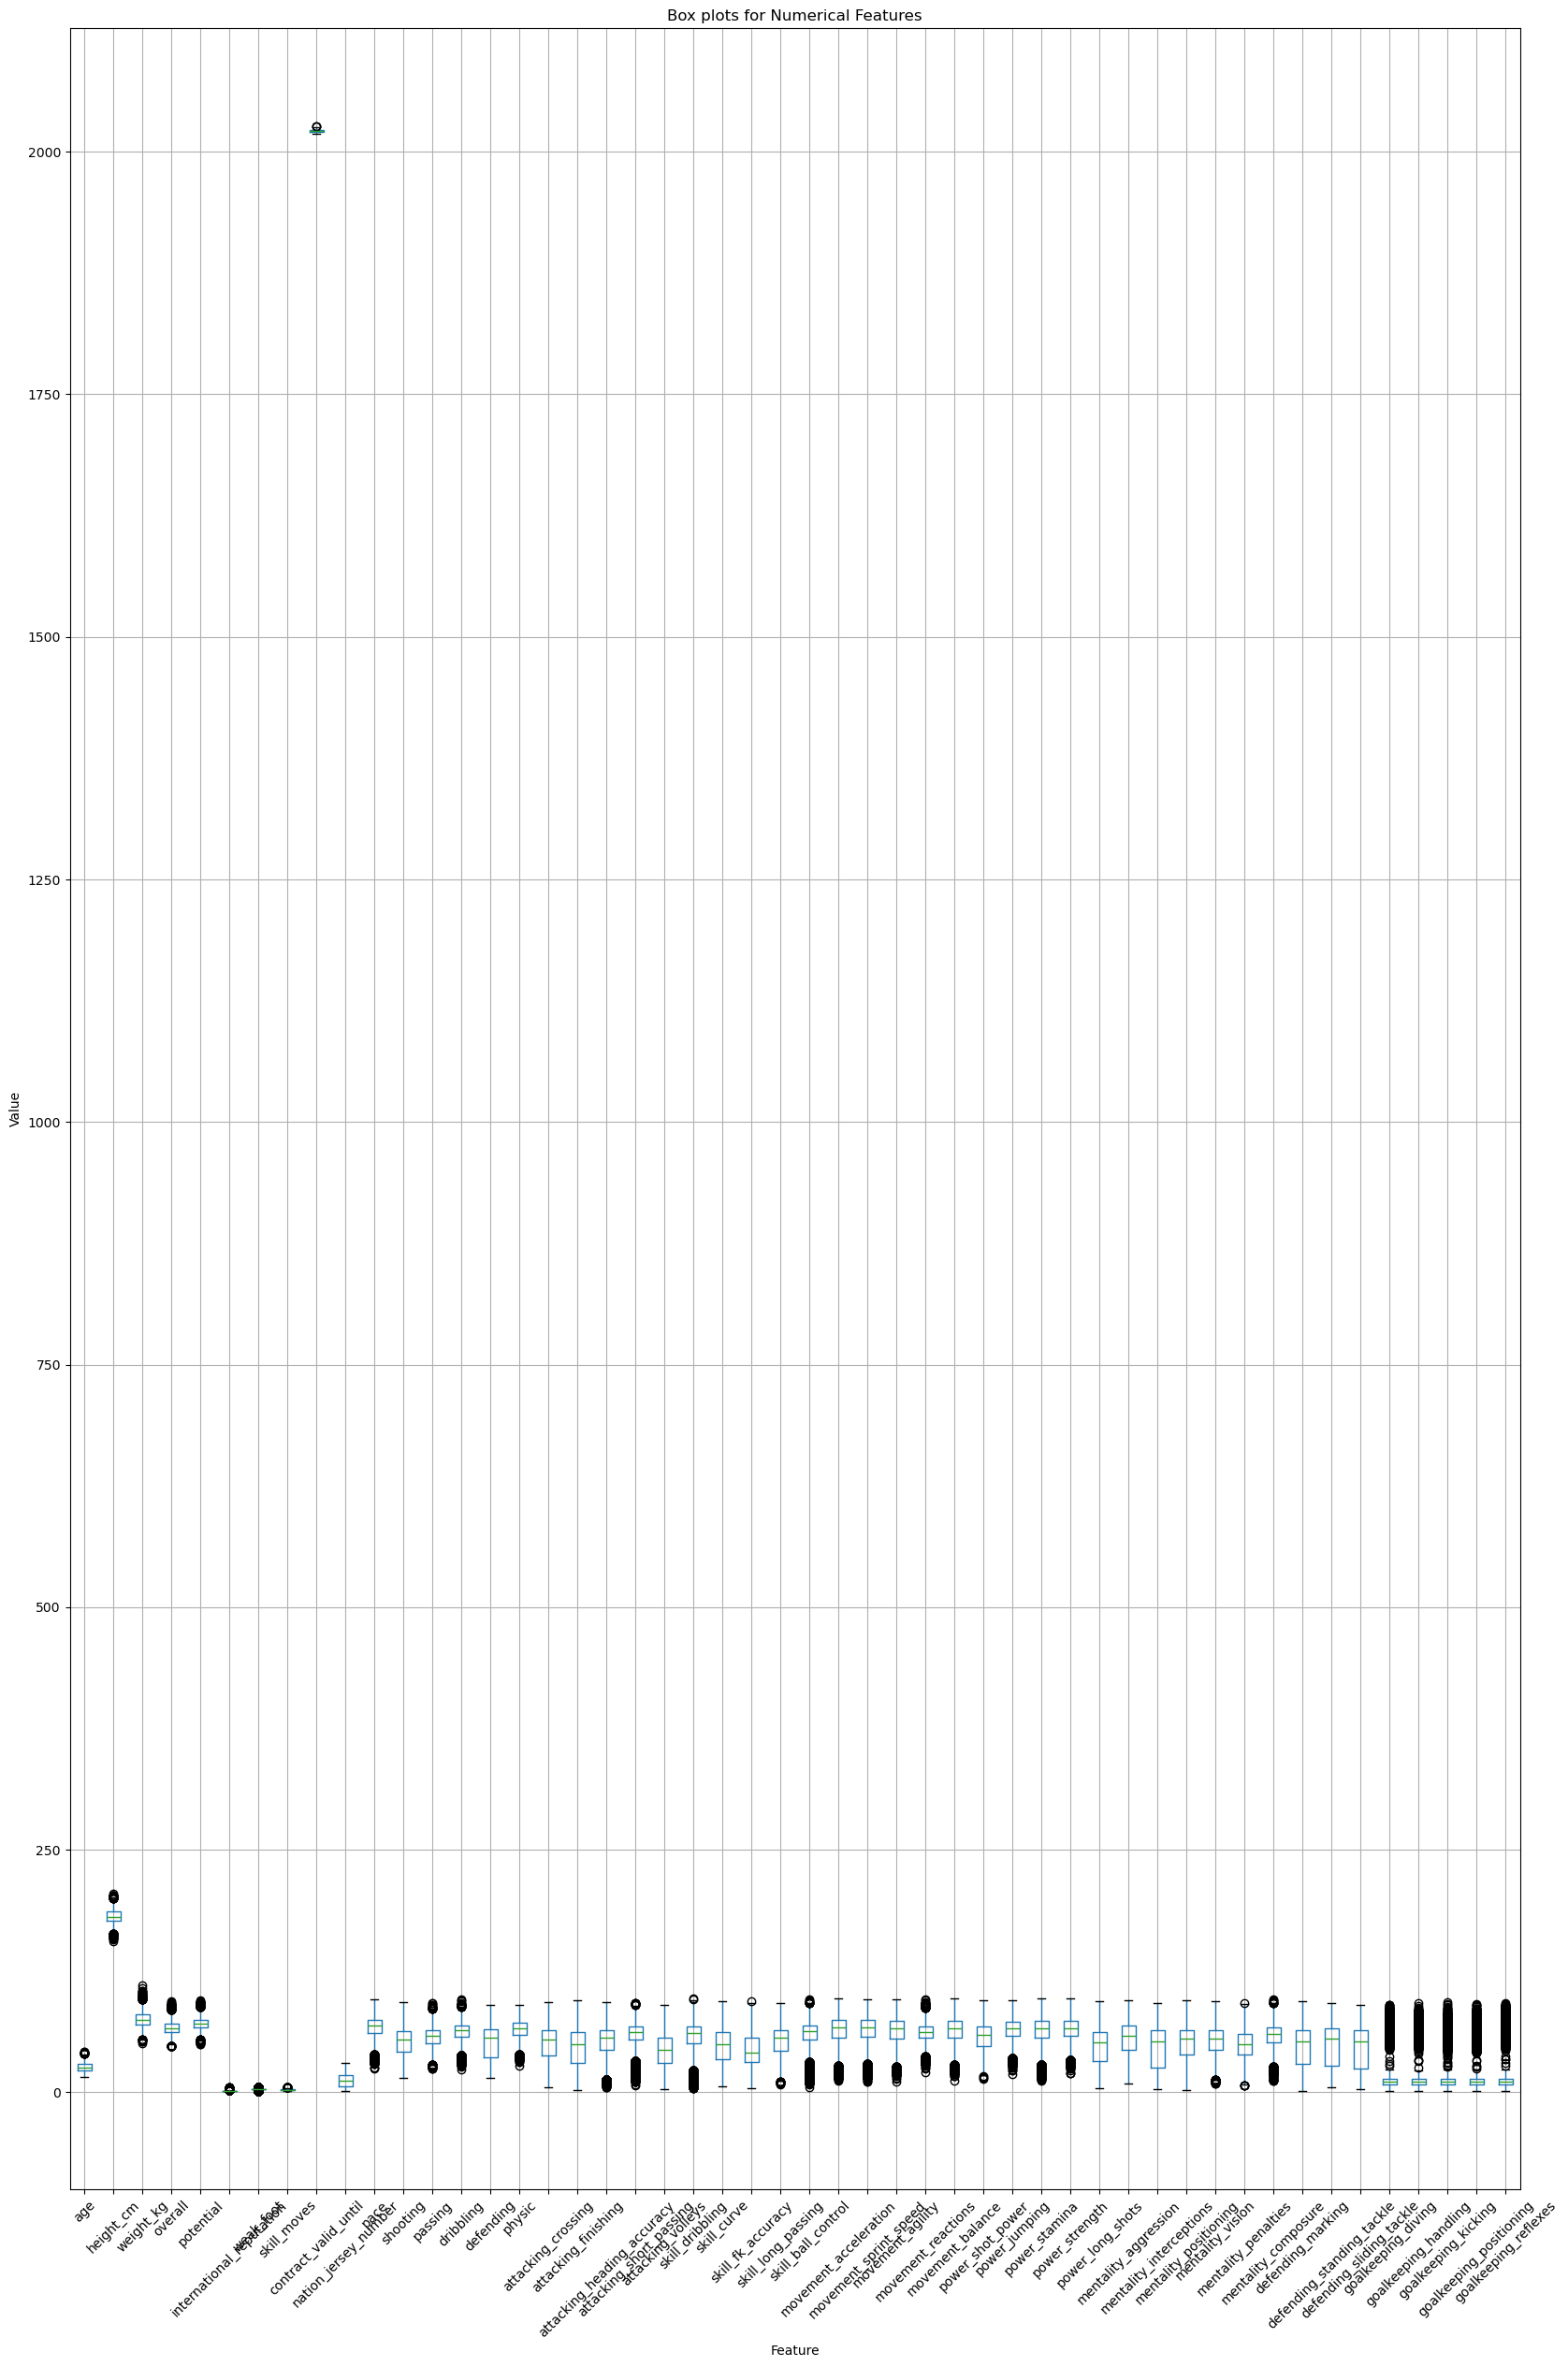

In [77]:
# Select numerical columns
numerical_cols = data1.select_dtypes(include=['int', 'float']).columns

# Create box plots for all numerical features
plt.figure(figsize=(20,30))
data[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

In [ ]:
#Removing outliers

In [79]:
import pandas as pd

# Define a function to replace outliers with the median
def replace_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers below the lower bound with the median
        df.loc[df[col] < lower_bound, col] = df[col].median()
        # Replace outliers above the upper bound with the median
        df.loc[df[col] > upper_bound, col] = df[col].median()
    return df

# Apply the function
numerical_cols = [
    'age', 'height_cm', 'weight_kg', 'overall', 'potential',
    'international_reputation', 'weak_foot', 'skill_moves',
    'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
    'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
    'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
    'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
    'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision', 'mentality_penalties',
    'mentality_composure', 'defending_marking', 'defending_standing_tackle',
    'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

# Replace outliers while retaining all rows
data2= replace_outliers_iqr(data1, numerical_cols)


In [81]:
data2.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'def

In [84]:
data2.isnull().sum()

age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
loaned_from                   17230
joined                         1288
contract_valid_until            240
nation_position               17152
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling             

# Data Preprocessing

In [86]:
# Handle missing values
# For numerical columns, fill missing values with the mean
numerical_columns = data2.select_dtypes(include=[np.number]).columns
data1[numerical_columns] = data2[numerical_columns].fillna(data1[numerical_columns].mean())

# For categorical columns, fill missing values with the mode
categorical_columns = data2.select_dtypes(include=['object']).columns
data1[categorical_columns] = data2[categorical_columns].fillna(data1[categorical_columns].mode().iloc[0])
print(data1.isnull().sum())

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
loaned_from                   0
joined                        0
contract_valid_until          0
nation_position               0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ba

In [88]:
data2.shape

(18278, 56)

# Scaling

In [90]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define numerical and categorical columns
num_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall']
cat_cols = ['nationality', 'club', 'team_position', 'player_positions', 'preferred_foot']

# Check existing columns in DataFrame
existing_num_cols = [col for col in num_cols if col in data2.columns]
existing_cat_cols = [col for col in cat_cols if col in data2.columns]

# Print missing columns for debugging (optional)
missing_num_cols = set(num_cols) - set(existing_num_cols)
missing_cat_cols = set(cat_cols) - set(existing_cat_cols)

if missing_num_cols:
    print(f"Warning: Missing numerical columns: {missing_num_cols}")
if missing_cat_cols:
    print(f"Warning: Missing categorical columns: {missing_cat_cols}")

# Ensure there are columns to process
if not existing_num_cols and not existing_cat_cols:
    raise ValueError("No valid numerical or categorical columns found in the dataset!")

# Define ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), existing_num_cols) if existing_num_cols else None,
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), existing_cat_cols) if existing_cat_cols else None
])

# Remove None transformers
preprocessor.transformers = [t for t in preprocessor.transformers if t is not None]

# Apply transformations
data_transformed = preprocessor.fit_transform(data2)

# Extract feature names
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(existing_cat_cols) if existing_cat_cols else []
all_columns = existing_num_cols + list(encoded_columns)

# Convert to DataFrame
data_final = pd.DataFrame(data_transformed, columns=all_columns)

# Display transformed dataset
print("Data Transformation Successful! Preview:")
print(data_final.head())


Data Transformation Successful! Preview:
           pace  shooting   passing     dribbling  defending    physic  \
0  1.933285e+00  3.002116  0.073221  7.874242e-02  -0.811077  0.097106   
1  2.245530e+00  3.077732  2.565108  7.874242e-02  -1.069516  1.453548   
2  2.349611e+00  2.472798  0.073221  7.874242e-02  -1.263345 -0.807188   
3  1.479090e-15  0.000000  0.000000  8.358513e-16   0.000000  0.000000   
4  2.349611e+00  2.321564  0.073221  7.874242e-02  -1.069516  0.097106   

    overall  player_positions_CAM  player_positions_CAM, CDM  \
0 -0.024375                   0.0                        0.0   
1 -0.024375                   0.0                        0.0   
2 -0.024375                   0.0                        0.0   
3 -0.024375                   0.0                        0.0   
4 -0.024375                   0.0                        0.0   

   player_positions_CAM, CDM, CB  ...  player_positions_ST, RW, CAM  \
0                            0.0  ...                     

# Minmax Scaler 

In [92]:
from sklearn import preprocessing
x = data_final.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm

0         1         2         3         4         5         6    \
0      0.839286  0.987179  0.517857  0.520833  0.320000  0.520000  0.485714   
1      0.892857  1.000000  0.946429  0.520833  0.266667  0.760000  0.485714   
2      0.910714  0.897436  0.517857  0.520833  0.226667  0.360000  0.485714   
3      0.507595  0.478183  0.505264  0.506888  0.487380  0.502819  0.485714   
4      0.910714  0.871795  0.517857  0.520833  0.266667  0.520000  0.485714   
...         ...       ...       ...       ...       ...       ...       ...   
18273  0.303571  0.102564  0.517857  0.520833  0.426667  0.220000  0.485714   
18274  0.321429  0.115385  0.071429  0.520833  0.440000  0.160000  0.485714   
18275  0.250000  0.256410  0.267857  0.125000  0.440000  0.220000  0.485714   
18276  0.339286  0.256410  0.321429  0.166667  0.400000  0.240000  0.485714   
18277  0.357143  0.217949  0.392857  0.125000  0.426667  0.300000  0.485714   

       7    8    9    ...  642  643  644  645  646  647  648  649  650  651  
0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
18273  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
18274  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
18275  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
18276  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
18277  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[18278 rows x 652 columns]

# PCA

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced

0         1
0     -1.082750 -0.321479
1      0.304239 -0.439606
2      0.308874 -0.375813
3      0.386107 -0.174849
4      0.310177 -0.335571
...         ...       ...
18273  0.343569  0.787749
18274  0.355693  0.869742
18275  0.348022  0.156267
18276  0.344328  0.105531
18277  0.342769  0.125716

[18278 rows x 2 columns]

# K Means

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()
clusters

[2,
 1,
 1,
 4,
 1,
 1,
 4,
 0,
 4,
 2,
 1,
 0,
 1,
 4,
 4,
 4,
 3,
 1,
 0,
 1,
 1,
 4,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 4,
 4,
 2,
 2,
 1,
 0,
 4,
 1,
 1,
 1,
 2,
 2,
 4,
 1,
 4,
 0,
 1,
 3,
 1,
 0,
 0,
 2,
 4,
 4,
 1,
 2,
 4,
 0,
 4,
 3,
 4,
 4,
 1,
 1,
 4,
 4,
 2,
 0,
 1,
 4,
 1,
 1,
 1,
 0,
 4,
 1,
 0,
 0,
 1,
 4,
 2,
 4,
 2,
 0,
 3,
 1,
 2,
 4,
 4,
 2,
 0,
 4,
 2,
 1,
 4,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 4,
 2,
 2,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 4,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 4,
 0,
 2,
 4,
 1,
 1,
 4,
 2,
 1,
 0,
 1,
 4,
 1,
 2,
 1,
 1,
 3,
 4,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,


# Elbow Method:

# Elbow Method For optimal K

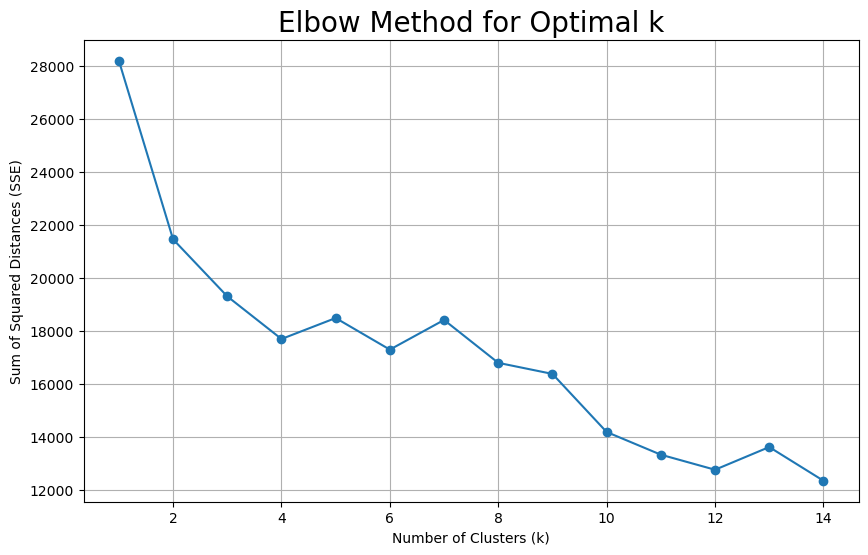

In [98]:
# Assuming X_norm is your DataFrame
X_norm.columns = X_norm.columns.astype(str)  # Convert all column names to strings

# Now proceed with KMeans
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42)  # Added random_state for reproducibility
    kmeans.fit(X_norm)
    X_norm["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_  # Save the sum of squared distances to the closest cluster center

# Now you can plot the SSE vs. K to find the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Optimal k', fontsize = 20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid()
plt.show()

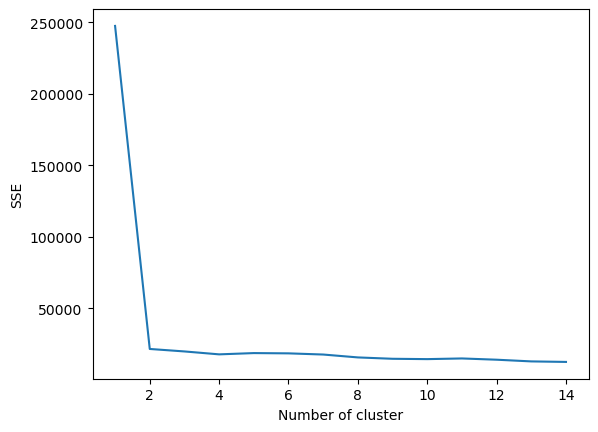

In [99]:
import numpy as np
from sklearn.cluster import KMeans

# Ensure all columns are strings
X_norm.columns = X_norm.columns.astype(str)

# Filter out non-numeric columns
X_norm = X_norm.select_dtypes(include=[np.number])

# KMeans clustering
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_norm)
    X_norm["clusters"] = kmeans.labels_
    # Print or store the sum of squared errors (sse)
    sse[k] = kmeans.inertia_
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [100]:
reduced['cluster'] = clusters
reduced.columns = ['x','y','cluster']
reduced.head()

x         y  cluster
0 -1.082750 -0.321479        2
1  0.304239 -0.439606        1
2  0.308874 -0.375813        1
3  0.386107 -0.174849        4
4  0.310177 -0.335571        1

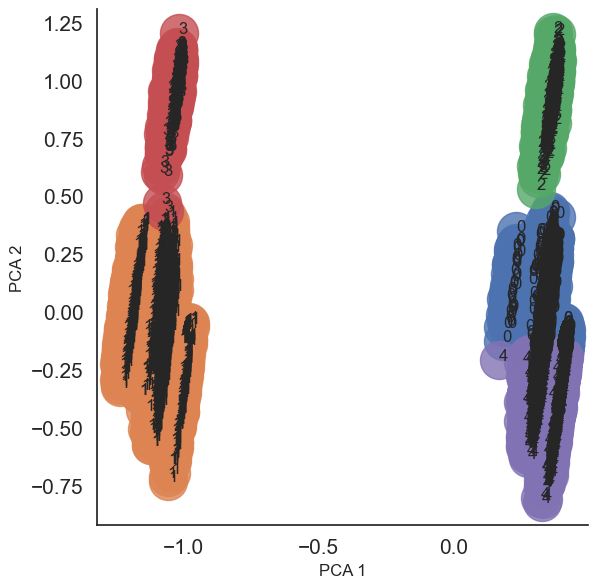

In [153]:
# Assuming 'reduced' is a DataFrame with columns 'x', 'y', and 'cluster'
sns.set(style="white")

# Update 'size' to 'height' in the lmplot call
ax = sns.lmplot(x="x", y="y", hue='cluster', data=reduced, height=6, legend=False, fit_reg=False, scatter_kws={"s": 750})

# Adjusting text labels (if needed)
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.cluster):
    texts.append(plt.text(x, y, s))
    
plt.tick_params(labelsize=15)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


plt.show()

# Silhouette_Score:

In [102]:
from sklearn.metrics import silhouette_score
silhouette_score(reduced, labels)

0.9105443336993249

In [112]:
data_final

pace  shooting   passing     dribbling  defending    physic  \
0      1.933285e+00  3.002116  0.073221  7.874242e-02  -0.811077  0.097106   
1      2.245530e+00  3.077732  2.565108  7.874242e-02  -1.069516  1.453548   
2      2.349611e+00  2.472798  0.073221  7.874242e-02  -1.263345 -0.807188   
3      1.479090e-15  0.000000  0.000000  8.358513e-16   0.000000  0.000000   
4      2.349611e+00  2.321564  0.073221  7.874242e-02  -1.069516  0.097106   
...             ...       ...       ...           ...        ...       ...   
18273 -1.189166e+00 -2.215444  0.073221  7.874242e-02  -0.294200 -1.598445   
18274 -1.085085e+00 -2.139827 -2.522495  7.874242e-02  -0.229591 -1.937555   
18275 -1.501412e+00 -1.308042 -1.380380 -2.156334e+00  -0.229591 -1.598445   
18276 -9.810030e-01 -1.308042 -1.068894 -1.921063e+00  -0.423419 -1.485408   
18277 -8.769213e-01 -1.534893 -0.653580 -2.156334e+00  -0.294200 -1.146298   

        overall  player_positions_CAM  player_positions_CAM, CDM  \
0     -0.024375                   0.0                        0.0   
1     -0.024375                   0.0                        0.0   
2     -0.024375                   0.0                        0.0   
3     -0.024375                   0.0                        0.0   
4     -0.024375                   0.0                        0.0   
...         ...                   ...                        ...   
18273 -0.024375                   0.0                        0.0   
18274 -0.024375                   0.0                        0.0   
18275 -0.024375                   0.0                        0.0   
18276 -0.024375                   0.0                        0.0   
18277 -0.024375                   0.0                        0.0   

       player_positions_CAM, CDM, CB  ...  player_positions_ST, RW, CAM  \
0                                0.0  ...                           0.0   
1                                0.0  ...                           0.0   
2                                0.0  ...                           0.0   
3                                0.0  ...                           0.0   
4                                0.0  ...                           0.0   
...                              ...  ...                           ...   
18273                            0.0  ...                           0.0   
18274                            0.0  ...                           0.0   
18275                            0.0  ...                           0.0   
18276                            0.0  ...                           0.0   
18277                            0.0  ...                           0.0   

       player_positions_ST, RW, CF  player_positions_ST, RW, LM  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
18273                          0.0                          0.0   
18274                          0.0                          0.0   
18275                          0.0                          0.0   
18276                          0.0                          0.0   
18277                          0.0                          0.0   

       player_positions_ST, RW, LW  player_positions_ST, RW, RB  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
18273                          0.0                          0.0   
18274              

In [93]:
data2.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
      

# Conclusion

Top 10 Countries Producing the Most Players:
nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64


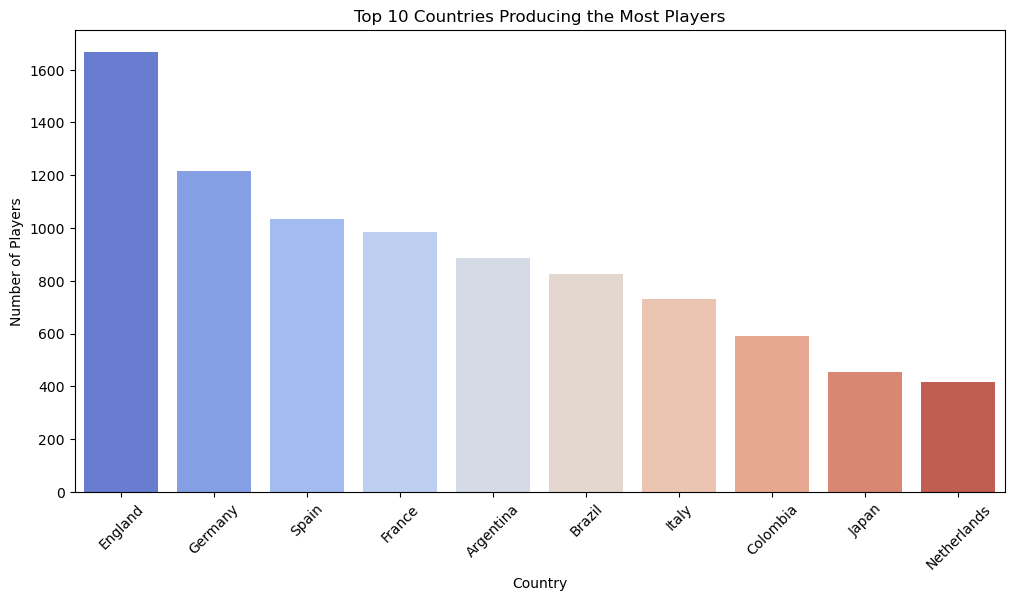

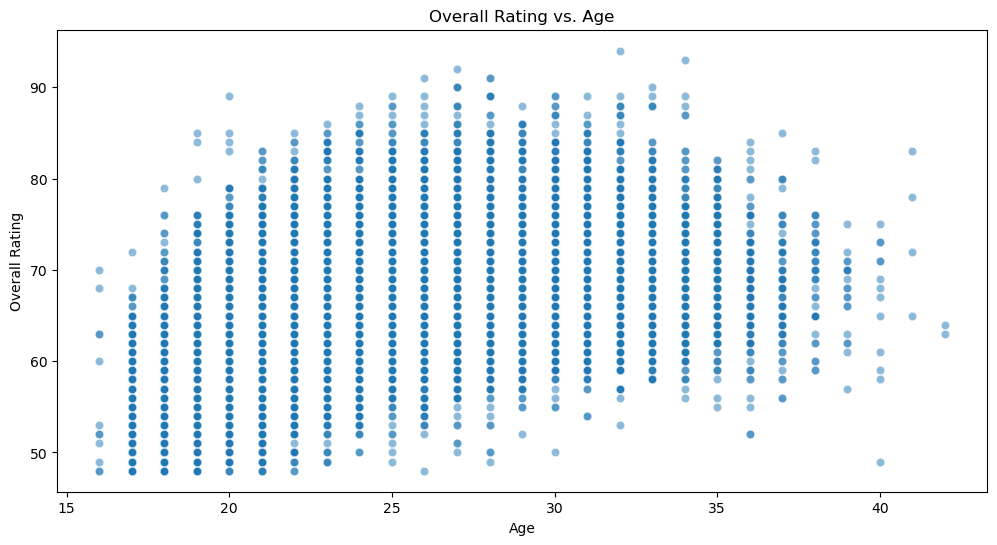

Players stop improving after age: 42
Average Wages of Offensive Positions:
team_position
LW    23308.641975
RW    21024.844720
ST    16451.965066
Name: wage_eur, dtype: float64


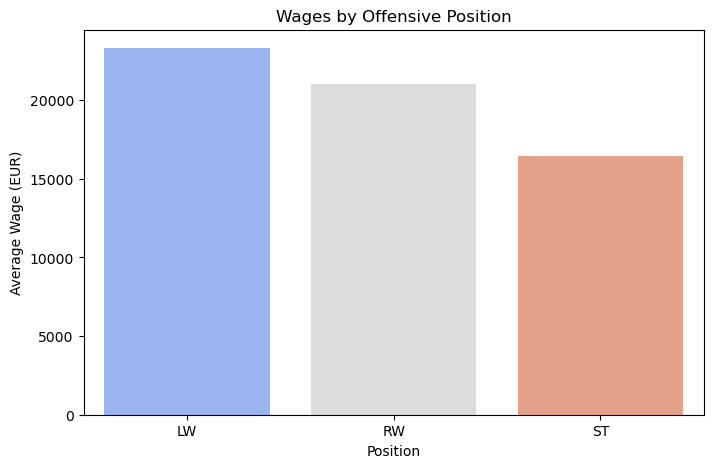

In [114]:
# 1. Top 10 Countries Producing the Most Players
top_countries = data['nationality'].value_counts().head(10)
print("Top 10 Countries Producing the Most Players:")
print(top_countries)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Countries Producing the Most Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

# 2. Overall Rating vs. Age Distribution
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['age'], y=data['overall'], alpha=0.5)
plt.title('Overall Rating vs. Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

# Identify the age after which players stop improving
age_rating = data.groupby('age')['overall'].mean()
decline_age = age_rating.diff().idxmin()
print(f'Players stop improving after age: {decline_age}')

# 3. Which Offensive Position Gets Paid the Most?
offensive_positions = data[data['team_position'].isin(['ST', 'RW', 'LW'])]
avg_wages = offensive_positions.groupby('team_position')['wage_eur'].mean().sort_values(ascending=False)
print("Average Wages of Offensive Positions:")
print(avg_wages)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_wages.index, y=avg_wages.values, palette='coolwarm')
plt.title('Wages by Offensive Position')
plt.xlabel('Position')
plt.ylabel('Average Wage (EUR)')
plt.show()

In [116]:
print("\nConclusion:")
print("- The dataset has", data.shape[0], "players after cleaning.")
print("- Players were clustered into 3 groups based on their attributes.")
print("- The top country producing players is", top_countries.idxmax(), "with", top_countries.max(), "players.")
print(f"- Players stop improving after approximately age {decline_age}.")
print(f"- The highest paid offensive position is {avg_wages.idxmax()} with an average wage of {avg_wages.max()} EUR.")
print("- The model comparison suggests that Random Forest performed best (if applicable).")


Conclusion:
- The dataset has 18278 players after cleaning.
- Players were clustered into 3 groups based on their attributes.
- The top country producing players is England with 1667 players.
- Players stop improving after approximately age 42.
- The highest paid offensive position is LW with an average wage of 23308.64197530864 EUR.
- The model comparison suggests that Random Forest performed best (if applicable).
